In [241]:
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import VotingClassifier

In [242]:
sns.set()

## Import phenotypic data

In [243]:
os.chdir('/Users/annika/Documents/PhD/courses/Roche_Hackathon')
data_pheno = pd.read_csv('data/train/train.csv', index_col=0, encoding = 'utf-8')
data_pheno.reset_index(inplace=True, drop=True)
print(data_pheno.shape)
data_pheno.head()

(700, 29)


,subject,DX_GROUP,SITE_ID,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,...,func_efc,func_fber,func_fwhm,func_dvars,func_outlier,func_quality,func_mean_fd,func_num_fd,func_perc_fd,func_gsr
0,50992,1,NYU,10.6600,1,NaN,27.00,118.0,106.0,129.0,...,0.494116,139.773112,1.862470,1.045963,0.007709,0.012301,0.088934,14.0,7.734807,-0.008654
1,50502,1,USM,32.9582,1,NaN,80.00,90.0,101.0,83.0,...,0.545198,70.912103,1.903566,1.059806,0.000560,0.016762,0.105971,8.0,3.319502,0.038568
2,51303,2,UCLA_2,13.0000,2,R,NaN,99.0,95.0,103.0,...,0.556980,77.080155,1.962941,1.234783,0.000880,0.004220,0.031307,0.0,0.000000,0.033496
3,50515,1,USM,15.8522,1,NaN,73.33,94.0,71.0,106.0,...,0.529615,97.692980,1.774941,1.073596,0.000853,0.013464,0.080833,15.0,6.224066,0.028694
4,51349,1,MAX_MUN,11.0000,1,R,NaN,105.0,NaN,NaN,...,0.577702,80.349009,1.862485,1.024788,0.001711,0.020317,0.133192,38.0,18.905473,0.041147


## Data exploration

In [244]:
data_pheno.dtypes

subject                  int64
DX_GROUP                 int64
SITE_ID                 object
AGE_AT_SCAN            float64
SEX                      int64
HANDEDNESS_CATEGORY     object
HANDEDNESS_SCORES      float64
FIQ                    float64
VIQ                    float64
PIQ                    float64
BMI                    float64
fn_image_txt            object
EYE_STATUS_AT_SCAN       int64
anat_cnr               float64
anat_efc               float64
anat_fber              float64
anat_fwhm              float64
anat_qi1               float64
anat_snr               float64
func_efc               float64
func_fber              float64
func_fwhm              float64
func_dvars             float64
func_outlier           float64
func_quality           float64
func_mean_fd           float64
func_num_fd            float64
func_perc_fd           float64
func_gsr               float64
dtype: object

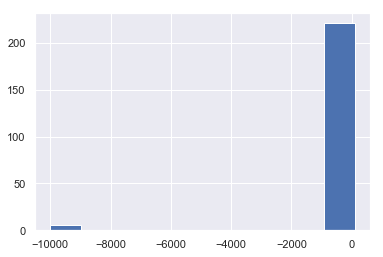

In [245]:
data_pheno.HANDEDNESS_SCORES.hist();

## Starting cleaning

In [246]:
data_pheno.apply(lambda x: np.any(x==-9999))

subject                False
DX_GROUP               False
SITE_ID                False
AGE_AT_SCAN            False
SEX                    False
HANDEDNESS_CATEGORY    False
HANDEDNESS_SCORES       True
FIQ                     True
VIQ                     True
PIQ                     True
BMI                     True
fn_image_txt           False
EYE_STATUS_AT_SCAN     False
anat_cnr               False
anat_efc               False
anat_fber              False
anat_fwhm              False
anat_qi1               False
anat_snr               False
func_efc               False
func_fber              False
func_fwhm              False
func_dvars             False
func_outlier           False
func_quality           False
func_mean_fd           False
func_num_fd            False
func_perc_fd           False
func_gsr               False
dtype: bool

In [247]:
clean = data_pheno.copy()

### Replace -9999 with NaN

In [248]:
clean.loc[clean.BMI==-9999,'BMI'] = np.nan
clean.loc[clean.HANDEDNESS_SCORES==-9999, 'HANDEDNESS_SCORES'] = np.nan
clean.loc[clean.HANDEDNESS_CATEGORY=='-9999', 'HANDEDNESS_CATEGORY'] = np.nan
clean.loc[clean.FIQ==-9999, 'FIQ'] = np.nan
clean.loc[clean.PIQ==-9999, 'PIQ'] = np.nan
clean.loc[clean.VIQ==-9999, 'VIQ'] = np.nan

In [249]:
clean.apply(lambda x: np.any(x==-9999))

subject                False
DX_GROUP               False
SITE_ID                False
AGE_AT_SCAN            False
SEX                    False
HANDEDNESS_CATEGORY    False
HANDEDNESS_SCORES      False
FIQ                    False
VIQ                    False
PIQ                    False
BMI                    False
fn_image_txt           False
EYE_STATUS_AT_SCAN     False
anat_cnr               False
anat_efc               False
anat_fber              False
anat_fwhm              False
anat_qi1               False
anat_snr               False
func_efc               False
func_fber              False
func_fwhm              False
func_dvars             False
func_outlier           False
func_quality           False
func_mean_fd           False
func_num_fd            False
func_perc_fd           False
func_gsr               False
dtype: bool

In [250]:
clean.isna().sum()

subject                  0
DX_GROUP                 0
SITE_ID                  0
AGE_AT_SCAN              0
SEX                      0
HANDEDNESS_CATEGORY    205
HANDEDNESS_SCORES      479
FIQ                     58
VIQ                    121
PIQ                    111
BMI                    633
fn_image_txt             0
EYE_STATUS_AT_SCAN       0
anat_cnr                 0
anat_efc                 0
anat_fber                0
anat_fwhm                0
anat_qi1                 0
anat_snr                 0
func_efc                 0
func_fber                0
func_fwhm                0
func_dvars               0
func_outlier             0
func_quality             0
func_mean_fd             0
func_num_fd              0
func_perc_fd             0
func_gsr                 0
dtype: int64

### Interpret handedness scores as handedness category

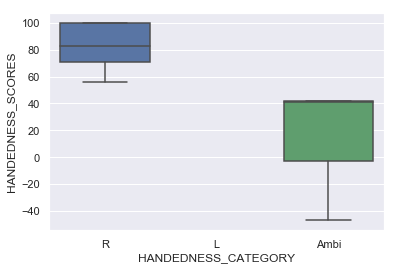

In [251]:
clean.loc[clean.HANDEDNESS_CATEGORY.isin(['Ambi', 'Mixed', 'L->R']), 'HANDEDNESS_CATEGORY'] = 'Ambi'
sns.boxplot(y='HANDEDNESS_SCORES', x='HANDEDNESS_CATEGORY', data=clean);

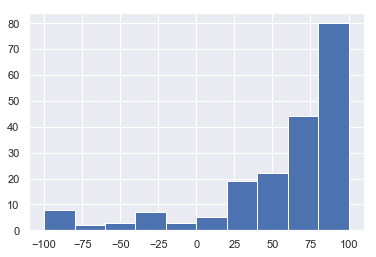

In [252]:
clean[clean.HANDEDNESS_CATEGORY.isna()].HANDEDNESS_SCORES.hist();

In [253]:
clean.loc[clean.HANDEDNESS_SCORES > 50, 'HANDEDNESS_CATEGORY'] = 'R'
clean.loc[clean.HANDEDNESS_SCORES < -50, 'HANDEDNESS_CATEGORY'] = 'L'
clean.loc[(clean.HANDEDNESS_SCORES > -50) & (clean.HANDEDNESS_SCORES < 50), 'HANDEDNESS_CATEGORY'] = 'Ambi'

#### Convert handedness categories to integer for learning

In [254]:
clean.loc[clean.HANDEDNESS_CATEGORY == 'R', 'HANDEDNESS_CATEGORY'] = 2 
clean.loc[clean.HANDEDNESS_CATEGORY == 'Ambi', 'HANDEDNESS_CATEGORY'] = 1
clean.loc[clean.HANDEDNESS_CATEGORY == 'L', 'HANDEDNESS_CATEGORY'] = 0 

In [255]:
data_pheno.HANDEDNESS_CATEGORY.isna().sum(), clean.HANDEDNESS_CATEGORY.isna().sum()

(199, 13)

In [256]:
clean.isna().sum(axis=1).sort_values().tail()

623    4
349    4
239    5
107    5
29     5
dtype: int64

In [257]:
clean.iloc[[239,107,29],list(range(12))]

,subject,DX_GROUP,SITE_ID,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,BMI,fn_image_txt
239,50132,1,OLIN,16.00,1,2,NaN,NaN,NaN,NaN,NaN,Olin_0050132.txt
107,50125,1,OLIN,24.00,2,2,NaN,NaN,NaN,NaN,NaN,Olin_0050125.txt
29,50156,1,OHSU,15.23,1,2,NaN,NaN,NaN,NaN,NaN,OHSU_0050156.txt


In [258]:
clean[['subject', 'DX_GROUP', 'SITE_ID', 'AGE_AT_SCAN', 'SEX',
       'HANDEDNESS_CATEGORY', 'FIQ', 
       'fn_image_txt', 'EYE_STATUS_AT_SCAN', 'anat_cnr', 'anat_efc',
       'anat_fber', 'anat_fwhm', 'anat_qi1', 'anat_snr', 'func_efc',
       'func_fber', 'func_fwhm', 'func_dvars', 'func_outlier', 'func_quality',
       'func_mean_fd', 'func_num_fd', 'func_perc_fd', 'func_gsr']].isna().sum()

subject                 0
DX_GROUP                0
SITE_ID                 0
AGE_AT_SCAN             0
SEX                     0
HANDEDNESS_CATEGORY    13
FIQ                    58
fn_image_txt            0
EYE_STATUS_AT_SCAN      0
anat_cnr                0
anat_efc                0
anat_fber               0
anat_fwhm               0
anat_qi1                0
anat_snr                0
func_efc                0
func_fber               0
func_fwhm               0
func_dvars              0
func_outlier            0
func_quality            0
func_mean_fd            0
func_num_fd             0
func_perc_fd            0
func_gsr                0
dtype: int64

In [259]:
clean[clean.HANDEDNESS_CATEGORY.isna() & clean.FIQ.isna()]

,subject,DX_GROUP,SITE_ID,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,...,func_efc,func_fber,func_fwhm,func_dvars,func_outlier,func_quality,func_mean_fd,func_num_fd,func_perc_fd,func_gsr


=> The missing values in FIQ and HANDEDNESS CATEGORY don't overlap.

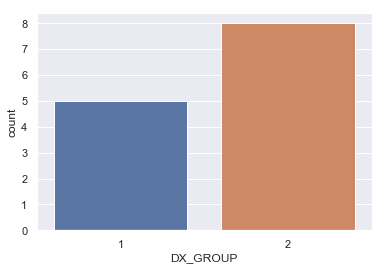

In [260]:
sns.countplot(data=clean[clean.HANDEDNESS_CATEGORY.isna()], x='DX_GROUP')

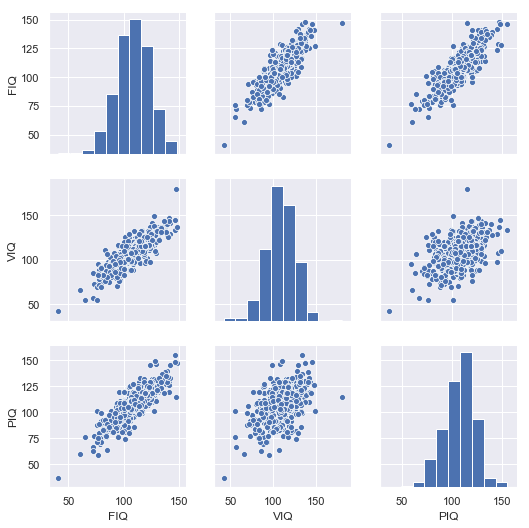

In [261]:
sns.pairplot(data=clean.dropna(subset=['FIQ','VIQ', 'PIQ']),  vars=['FIQ','VIQ', 'PIQ']) ;

=> Won't try to impute IQ values.

In [262]:
exist = clean.dropna(subset=['FIQ', 'HANDEDNESS_CATEGORY'])

## More data exploration

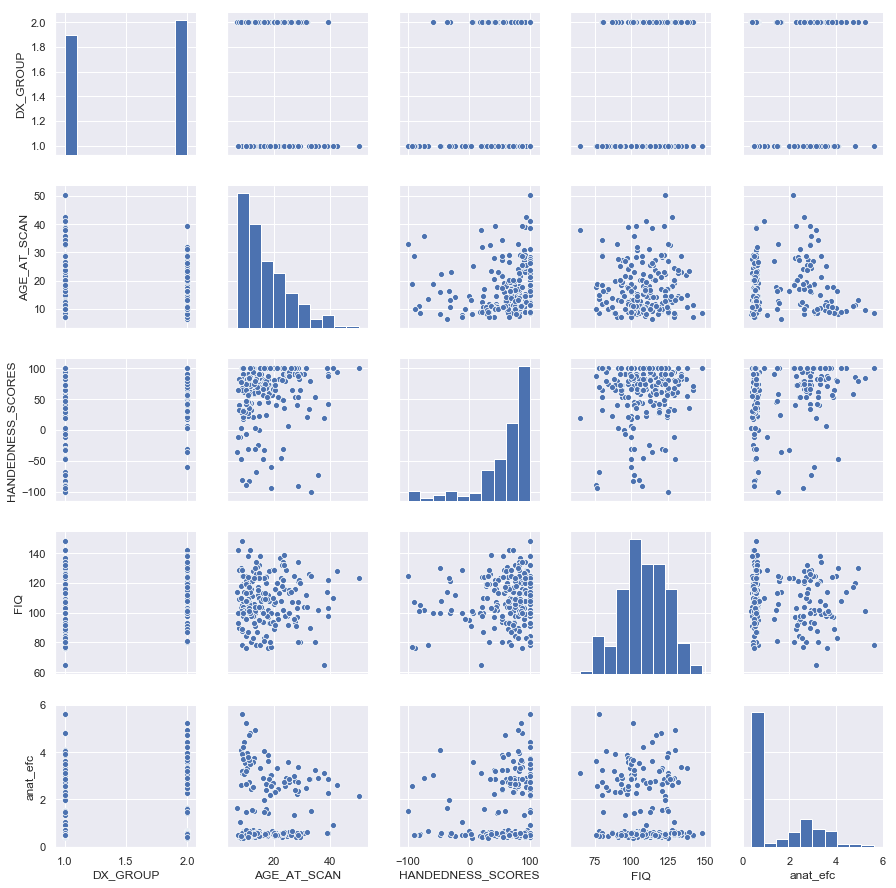

In [263]:
sns.pairplot(data=clean.dropna(subset=['DX_GROUP', 'AGE_AT_SCAN', 'HANDEDNESS_SCORES', 'FIQ']), 
             vars=['DX_GROUP', 'AGE_AT_SCAN', 'HANDEDNESS_SCORES', 'FIQ', 'anat_efc']);

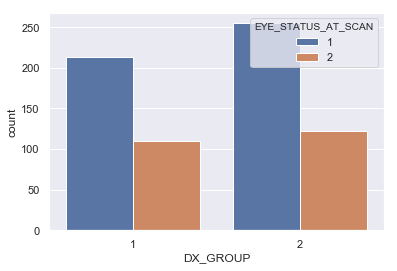

In [264]:
sns.countplot(x='DX_GROUP', data=clean, hue='EYE_STATUS_AT_SCAN');

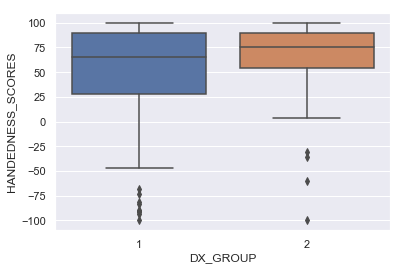

In [265]:
sns.boxplot(y='HANDEDNESS_SCORES', x='DX_GROUP', data=clean);

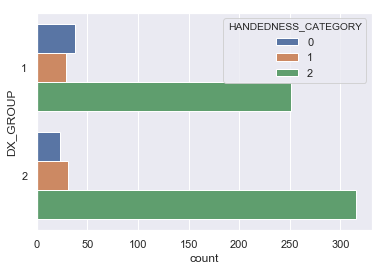

In [266]:
sns.countplot(hue='HANDEDNESS_CATEGORY', y='DX_GROUP', data=clean);

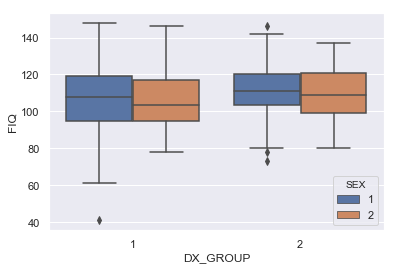

In [267]:
sns.boxplot(y='FIQ', x='DX_GROUP', hue='SEX', data=clean);

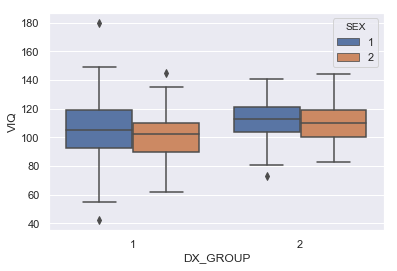

In [268]:
sns.boxplot(y='VIQ', x='DX_GROUP', hue='SEX', data=clean);

### Is one sex or one disease status overrepresented?

In [269]:
np.sum(clean.SEX == 1), np.sum(clean.SEX == 2)

(592, 108)

In [270]:
np.sum(clean.DX_GROUP == 1), np.sum(clean.DX_GROUP == 2)

(323, 377)

In [271]:
np.sum((clean.DX_GROUP == 1) & (clean.SEX == 1)), np.sum((clean.DX_GROUP == 1) & (clean.SEX == 2))

(282, 41)

=> Yes, there are about 5 times as many males as females in the total sample, and there are about 6.5 times as many males as females in the diseased group. The proportion of diseased to healthy subjects is approximately equal.

## Training SVM

### without Handedness category

In [272]:
learnDF = exist[['DX_GROUP','AGE_AT_SCAN', 'FIQ',
        'EYE_STATUS_AT_SCAN', 'anat_cnr', 'anat_efc',
       'anat_fber', 'anat_fwhm', 'anat_qi1', 'anat_snr', 'func_efc',
       'func_fber', 'func_fwhm', 'func_dvars', 'func_outlier', 'func_quality',
       'func_mean_fd', 'func_num_fd', 'func_perc_fd', 'func_gsr']]

label = learnDF['DX_GROUP']
labels = np.ravel(np.c_[label])
features = learnDF.drop('DX_GROUP', axis = 1)

features_scaled = preprocessing.scale(features)

features_train, features_test, labels_train, labels_test = train_test_split(features_scaled, labels, test_size=.3, random_state=42)

In [273]:
clfsvm = SVC(probability=True)
clfsvm.fit(features_train, labels_train)
predSvcTrain = clfsvm.predict(features_train)
print("Classifier has an accuracy of {:.2f}% on the training data.".format((labels_train == predSvcTrain).mean()*100))

predSvcTest = clfsvm.predict(features_test)
print("Classifier has an accuracy of {:.2f}% on the test data.".format((labels_test == predSvcTest).mean()*100))

Classifier has an accuracy of 73.64% on the training data.
Classifier has an accuracy of 58.73% on the test data.


=> This doe not include the handedness category, since that has to be encoded as integers first:

### with Handedness category

In [274]:
learnDFv2 = exist[['DX_GROUP','AGE_AT_SCAN', 'FIQ', 'HANDEDNESS_CATEGORY',
        'EYE_STATUS_AT_SCAN', 'anat_cnr', 'anat_efc',
       'anat_fber', 'anat_fwhm', 'anat_qi1', 'anat_snr', 'func_efc',
       'func_fber', 'func_fwhm', 'func_dvars', 'func_outlier', 'func_quality',
       'func_mean_fd', 'func_num_fd', 'func_perc_fd', 'func_gsr']]

label = learnDFv2['DX_GROUP']
labels = np.ravel(np.c_[label])
features = learnDFv2.drop('DX_GROUP', axis = 1)

features_scaled = preprocessing.scale(features)

features_train, features_test, labels_train, labels_test = train_test_split(features_scaled, labels, test_size=.3, random_state=42)

In [275]:
clfsvm = SVC(probability=True)
clfsvm.fit(features_train, labels_train)
predSvcTrain = clfsvm.predict(features_train)
print("Classifier has an accuracy of {:.2f}% on the training data.".format((labels_train == predSvcTrain).mean()*100))

predSvcTest = clfsvm.predict(features_test)
print("Classifier has an accuracy of {:.2f}% on the test data.".format((labels_test == predSvcTest).mean()*100))

Classifier has an accuracy of 74.32% on the training data.
Classifier has an accuracy of 59.79% on the test data.


In [276]:
predSvcTrain

array([2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 2,

#### with probabilities

In [277]:
predSvcTrain = clfsvm.predict_proba(features_scaled)

In [278]:
predSvcTrain

array([[ 0.45329607,  0.54670393],
       [ 0.52822743,  0.47177257],
       [ 0.39965245,  0.60034755],
       ..., 
       [ 0.36006267,  0.63993733],
       [ 0.65545315,  0.34454685],
       [ 0.34695993,  0.65304007]])

In [279]:
clfsvm.classes_

array([1, 2])

=> The probabilities correspond to the label order in clfsvm.classes_.

In [280]:
predSvcTrain = clfsvm.predict_proba(features_train)
probAsdTrain, probHealthyTrain = list(zip(*predSvcTrain))
probAsdTrain = np.array(probAsdTrain)
probHealthyTrain = np.array(probHealthyTrain)

train_right = (((labels_train == 1) & (prob_ASD > 0.5 )).mean()+ 
               ((labels_train == 2) & (prob_ASD < 0.5 )).mean())*100
print("Classifier has an accuracy of {:.2f}% on the training data.".format(train_right))

predSvcTest = clfsvm.predict_proba(features_test)
probAsdTest, probHealthyTest = list(zip(*predSvcTest))
probAsdTest = np.array(probAsdTest)
probHealthyTest = np.array(probHealthyTest)

test_right = (((labels_test == 1) & (probAsdTest > 0.5 )).mean()+
             ((labels_test == 2) & (probAsdTest < 0.5 )).mean())*100
print("Classifier has an accuracy of {:.2f}% on the test data.".format(test_right))

Classifier has an accuracy of 73.41% on the training data.
Classifier has an accuracy of 58.73% on the test data.


### dropping most quality measures and the age

In [281]:
learnDFv3 = exist[['DX_GROUP', 'FIQ', 'HANDEDNESS_CATEGORY',
        'EYE_STATUS_AT_SCAN', 'anat_efc', 'func_efc']]

label = learnDFv3['DX_GROUP']
labels = np.ravel(np.c_[label])
features = learnDFv3.drop('DX_GROUP', axis = 1)

features_scaled = preprocessing.scale(features)

features_train, features_test, labels_train, labels_test = train_test_split(features_scaled, labels, test_size=.3, random_state=42)

In [282]:
clfsvm = SVC(probability=True)
clfsvm.fit(features_train, labels_train)

predSvcTrain = clfsvm.predict_proba(features_train)
probAsdTrain, probHealthyTrain = list(zip(*predSvcTrain))
probAsdTrain = np.array(probAsdTrain)
probHealthyTrain = np.array(probHealthyTrain)

train_right = (((labels_train == 1) & (prob_ASD > 0.5 )).mean()+ 
               ((labels_train == 2) & (prob_ASD < 0.5 )).mean())*100
print("Classifier has an accuracy of {:.2f}% on the training data.".format(train_right))

predSvcTest = clfsvm.predict_proba(features_test)
probAsdTest, probHealthyTest = list(zip(*predSvcTest))
probAsdTest = np.array(probAsdTest)
probHealthyTest = np.array(probHealthyTest)

test_right = (((labels_test == 1) & (probAsdTest > 0.5 )).mean()+
             ((labels_test == 2) & (probAsdTest < 0.5 )).mean())*100
print("Classifier has an accuracy of {:.2f}% on the test data.".format(test_right))

Classifier has an accuracy of 73.41% on the training data.
Classifier has an accuracy of 56.08% on the test data.


### training on full intelligence only

In [283]:
learnDFv4 = exist[['DX_GROUP', 'FIQ']]

label = learnDFv4['DX_GROUP']
labels = np.ravel(np.c_[label])
features = learnDFv4.drop('DX_GROUP', axis = 1)

features_scaled = preprocessing.scale(features)

features_train, features_test, labels_train, labels_test = train_test_split(features_scaled, labels, test_size=.3, random_state=42)

In [284]:
clfsvm = SVC(probability=True)
clfsvm.fit(features_train, labels_train)

predSvcTrain = clfsvm.predict_proba(features_train)
probAsdTrain, probHealthyTrain = list(zip(*predSvcTrain))
probAsdTrain = np.array(probAsdTrain)
probHealthyTrain = np.array(probHealthyTrain)

train_right = (((labels_train == 1) & (prob_ASD > 0.5 )).mean()+ 
               ((labels_train == 2) & (prob_ASD < 0.5 )).mean())*100
print("Classifier has an accuracy of {:.2f}% on the training data.".format(train_right))

predSvcTest = clfsvm.predict_proba(features_test)
probAsdTest, probHealthyTest = list(zip(*predSvcTest))
probAsdTest = np.array(probAsdTest)
probHealthyTest = np.array(probHealthyTest)

test_right = (((labels_test == 1) & (probAsdTest > 0.5 )).mean()+
             ((labels_test == 2) & (probAsdTest < 0.5 )).mean())*100
print("Classifier has an accuracy of {:.2f}% on the test data.".format(test_right))

Classifier has an accuracy of 73.41% on the training data.
Classifier has an accuracy of 58.73% on the test data.


## Importing test data

In [285]:
os.chdir('/Users/annika/Documents/PhD/courses/Roche_Hackathon')
data_test = pd.read_csv('data 2/test/test_share.csv', index_col=0)
print(data_test.shape)
data_test.head()

(184, 28)


,subject,SITE_ID,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,BMI,...,func_efc,func_fber,func_fwhm,func_dvars,func_outlier,func_quality,func_mean_fd,func_num_fd,func_perc_fd,func_gsr
171,50246,TRINITY,19.5000,1,R,NaN,105.0,108.0,99.0,NaN,...,0.433332,162.594506,2.202584,1.150549,0.006192,0.009893,0.110698,15.0,9.933775,0.019778
697,51009,NYU,11.0300,1,NaN,-9.0,86.0,88.0,86.0,21.63,...,0.528379,115.786542,1.909761,1.069484,0.008498,0.016295,0.099712,10.0,5.524862,-0.007843
869,51191,STANFORD,9.7201,1,R,NaN,79.0,67.0,99.0,NaN,...,0.528708,67.422244,2.170657,1.302950,0.012164,0.009947,0.110340,37.0,15.352697,0.052731
814,51131,NYU,19.7300,1,NaN,68.0,119.0,112.0,123.0,-9999.00,...,0.534295,78.296410,1.765660,1.018414,0.006217,0.014129,0.032827,2.0,1.104972,-0.001329
790,51107,NYU,15.5300,1,NaN,73.0,107.0,112.0,99.0,21.17,...,0.535280,105.185145,1.728942,1.049717,0.006184,0.014243,0.034872,1.0,0.552486,0.000530


In [286]:
def cleanup(df):
    
    df.loc[df.BMI==-9999,'BMI'] = np.nan
    df.loc[df.HANDEDNESS_SCORES==-9999, 'HANDEDNESS_SCORES'] = np.nan
    df.loc[df.HANDEDNESS_CATEGORY=='-9999', 'HANDEDNESS_CATEGORY'] = np.nan
    df.loc[df.FIQ==-9999, 'FIQ'] = np.nan
    df.loc[df.PIQ==-9999, 'PIQ'] = np.nan
    df.loc[df.VIQ==-9999, 'VIQ'] = np.nan
    
    df.loc[df.HANDEDNESS_CATEGORY.isin(['Ambi', 'Mixed', 'L->R']), 'HANDEDNESS_CATEGORY'] = 'Ambi'
    
    df.loc[df.HANDEDNESS_SCORES > 50, 'HANDEDNESS_CATEGORY'] = 'R'
    df.loc[df.HANDEDNESS_SCORES < -50, 'HANDEDNESS_CATEGORY'] = 'L'
    df.loc[(df.HANDEDNESS_SCORES > -50) & (df.HANDEDNESS_SCORES < 50), 'HANDEDNESS_CATEGORY'] = 'Ambi'
    
    df.loc[df.HANDEDNESS_CATEGORY == 'R', 'HANDEDNESS_CATEGORY'] = 2 
    df.loc[df.HANDEDNESS_CATEGORY == 'Ambi', 'HANDEDNESS_CATEGORY'] = 1
    df.loc[df.HANDEDNESS_CATEGORY == 'L', 'HANDEDNESS_CATEGORY'] = 0 
    
    return df

In [287]:
clean_test = cleanup(df=data_test)
clean_test.isna().sum()

subject                  0
SITE_ID                  0
AGE_AT_SCAN              0
SEX                      0
HANDEDNESS_CATEGORY      1
HANDEDNESS_SCORES      114
FIQ                      5
VIQ                     24
PIQ                     21
BMI                    162
fn_image_txt             0
EYE_STATUS_AT_SCAN       0
anat_cnr                 0
anat_efc                 0
anat_fber                0
anat_fwhm                0
anat_qi1                 0
anat_snr                 0
func_efc                 0
func_fber                0
func_fwhm                0
func_dvars               0
func_outlier             0
func_quality             0
func_mean_fd             0
func_num_fd              0
func_perc_fd             0
func_gsr                 0
dtype: int64

In [288]:
exist_test = clean_test.dropna(subset=['FIQ', 'HANDEDNESS_CATEGORY'])

### Predicting on test data using FIQ only

In [289]:
learnDFv4 = exist[['DX_GROUP', 'FIQ']]

label = learnDFv4['DX_GROUP']
labels = np.ravel(np.c_[label])
features = learnDFv4.drop('DX_GROUP', axis = 1)

features_scaled = preprocessing.scale(features)

# Use the whole data as training
features_train, features_test, labels_train, labels_test = train_test_split(features_scaled, labels, 
                                test_size=0, random_state=42)

# Get the actual features of the test data
testdata_features = preprocessing.scale(exist_test[['FIQ']])

In [290]:
clfsvm = SVC(probability=True)
clfsvm.fit(features_train, labels_train)

testdata_predSvc = clfsvm.predict_proba(testdata_features)
testdata_probAsd, probHealthyTest = list(zip(*testdata_predSvc))
testdata_probAsd = np.array(testdata_probAsd)
testdata_probHealthy = np.array(testdata_probAsd)

In [291]:
answer = pd.DataFrame({'subject': exist_test.subject, 'probability_of_ASD':testdata_probAsd})
answer

,subject,probability_of_ASD
171,50246,0.392894
697,51009,0.686297
869,51191,0.677905
814,51131,0.382687
790,51107,0.383895
268,50345,0.382846
1077,51491,0.383188
1051,51465,0.569667
1037,51369,0.569667
664,50974,0.669792
